In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [6]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework

In [6]:
fname = r'/data/new_trap/20191104/Bead1/InitialTest/Data60.h5'
bdf = BeadDataFile.BeadDataFile(fname=fname)

No electrodes data
No cantilever data


In [7]:
foldername = r'/data/new_trap/20191204/Bead1/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

100  files in folder
100  files loaded


In [8]:
bb = bdf_discharge[0]
response_z = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]
response_x = [np.std(bb.response_at_freq('x',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [9]:
_,ax = plt.subplots()
ax.scatter(range(len(response_z)),response_z/response_z[47]/0.0636/3.1*3)
ax.scatter(range(len(response_z)),response_x/response_x[56]/0.0636/3.1*3)

<IPython.core.display.Javascript object>

In [10]:
bdf_x = bdf_discharge[52:57]
charges = 15

### Transfer function

In [11]:
fname = r'/data/new_trap/20191204/Bead1/TransFunc/TransFunc_X_4.h5'
fname2 = r'/data/new_trap/20191204/Bead1/TransFunc/TransFunc_X_4.h5'
bdf_tf_x = BeadDataFile.BeadDataFile(fname=fname)
bdf_tf_x2 = BeadDataFile.BeadDataFile(fname=fname2)

No cantilever data
Error loading spinning data
No cantilever data
Error loading spinning data


In [12]:
_,ax = plt.subplots()
ax.loglog(*bdf_tf_x.welch_psd('x'))
ax.loglog(*bdf_x[1].welch_psd('x'))
charges = np.std(bdf_tf_x.response_at_freq('x',drive_freq=147))/response_x[56]/0.0636/3.1*3*10/0.65
charges += np.std(bdf_tf_x.response_at_freq('x',drive_freq=154))/response_x[56]/0.0636/3.1*3*10/0.65
charges /= 2
print('numbre of charges:',charges)

<IPython.core.display.Javascript object>

numbre of charges: 25.0257841542293


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [13]:
print(np.std(bdf_tf_x.response_at_freq('x',drive_freq=259))/response_x[56]/0.0636/3.1*3*10/0.65/25)
print(np.std(bdf_tf_x.response_at_freq('x',drive_freq=21))/response_x[56]/0.0636/3.1*3*10/0.65/25)

1.7199121676394913
0.7994514937780823


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


### Gravity data

In [14]:
gfw = GravityFramework.GravityFramework()
foldername = r'/data/new_trap/20191204/Bead1/Shaking/Shaking370/'
datasets_num = 1000
gfw.BDFs = load_dir(foldername,file_prefix='Shaking1',max_file=datasets_num)

1000  files in folder
1000  files loaded


In [15]:
gfw.plot_dataset(bdf_i=13)

<IPython.core.display.Javascript object>

In [16]:
gfw.build_noise_array(sideband_freq=81)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  0.25300018202752367
x3 noise rms:  0.05353017164920328


In [17]:
m1s = gfw.build_x_response(bdf_x, drive_freq=151,charges=charges)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  8.84e+01
reduced chi2:  8.357675355729913
***************************************************
X2-amplitude:  8.84e+01
reduced chi2:  7.973775203336449
***************************************************
X2-amplitude:  8.84e+01
reduced chi2:  8.482895486910035
***************************************************
X2-amplitude:  8.89e+01
reduced chi2:  8.090453486511798
***************************************************
X2-amplitude:  8.96e+01
reduced chi2:  8.22476709014919
X3 to X2 ratio: 0.18682062835025937
X2 response (amplitude): 88.73777942864784


In [18]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(5), [m1.values[0] for m1 in m1s])
ax[1].scatter(range(5), [m1.values[1] for m1 in m1s])

<IPython.core.display.Javascript object>

In [19]:
drive_freq = 151
fit_kwargs = {'A': 10, 'f': drive_freq, 'phi': 0, 'A2': 2, 'f2': drive_freq,
              'delta_phi': 0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.1, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi], 'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': True,
              'fix_A2': False}
    
tmp_amp = gfw.get_amplitude(bdf=bdf_x[0], noise_rms=1, noise_rms2=1, **fit_kwargs)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  8.82e+01
reduced chi2:  24.851994222309134


In [20]:
tmp_amp[0]/gfw.scale_X2, 15*1.6e-19*20/8e-3*0.61

(6.068259547436134e-15, 3.6599999999999995e-15)

In [21]:
_,ax = plt.subplots()
ax.semilogy(range(len(gfw.noise_list_x2)),gfw.noise_list_x2/gfw.scale_X2,'.')
ax.set(ylim=(1e-18,1e-15))

<IPython.core.display.Javascript object>

[(1e-18, 1e-15)]

In [22]:
freq=13
gfw.build_noise_array(sideband_freq=freq*18)
tmp_amp20, m1s_20 = gfw.build_harmonics_array(freq=freq*20)
# gfw.build_noise_array(sideband_freq=freq*4)
# tmp_amp5, m1s_5 = gfw.build_harmonics_array(freq=freq*5)
# gfw.build_noise_array(sideband_freq=freq*12)
# tmp_amp6, m1s_6 = gfw.build_harmonics_array(freq=freq*6)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5.250231088801046
x3 noise rms:  1.3307838493447106
0 / 1000
***************************************************
X2-amplitude:  4.58e+00
reduced chi2:  0.31445572423654283
1 / 1000
***************************************************
X2-amplitude:  3.83e+00
reduced chi2:  0.3165174433631403
2 / 1000
***************************************************
X2-amplitude:  2.17e+00
reduced chi2:  0.3801512356097385
3 / 1000
***************************************************
X2-amplitude:  3.14e+00
reduced chi2:  0.29310773625631314
4 / 1000
***************************************************
X2-amplitude:  1.75e+00
reduced chi2:  0.30008160357831665
5 / 1000
***************************************************
X2-amplitude:  8.91e-01
reduced chi2:  0.6810572028171853
6 / 1000
***************************************************
X2-amplitude:  7.32e+00
reduced chi2:  0.42280842289146203
7 / 1000
***************************************************
X2-amplitude:  6.52e+00
reduced chi

***************************************************
X2-amplitude:  1.80e+00
reduced chi2:  0.2397236680784813
69 / 1000
***************************************************
X2-amplitude:  2.62e+00
reduced chi2:  0.4174589791619069
70 / 1000
***************************************************
X2-amplitude:  1.58e+00
reduced chi2:  0.3388898739663357
71 / 1000
***************************************************
X2-amplitude:  1.09e+00
reduced chi2:  0.30623791550567986
72 / 1000
***************************************************
X2-amplitude:  1.54e+00
reduced chi2:  0.48028471309364223
73 / 1000
***************************************************
X2-amplitude:  2.35e+00
reduced chi2:  0.6833245297926455
74 / 1000
***************************************************
X2-amplitude:  3.67e+00
reduced chi2:  0.7799507088281263
75 / 1000
***************************************************
X2-amplitude:  4.32e+00
reduced chi2:  0.7957168020936148
76 / 1000
**************************************

***************************************************
X2-amplitude:  2.55e+00
reduced chi2:  0.611362791960997
137 / 1000
***************************************************
X2-amplitude:  1.42e+00
reduced chi2:  0.37018384142821953
138 / 1000
***************************************************
X2-amplitude:  7.57e-01
reduced chi2:  0.363510350140558
139 / 1000
***************************************************
X2-amplitude:  8.00e-01
reduced chi2:  0.35225320803892
140 / 1000
***************************************************
X2-amplitude:  1.28e+00
reduced chi2:  0.36440605447731916
141 / 1000
***************************************************
X2-amplitude:  1.69e+00
reduced chi2:  0.5607804005255068
142 / 1000
***************************************************
X2-amplitude:  1.54e+00
reduced chi2:  0.43770261855471715
143 / 1000
***************************************************
X2-amplitude:  2.06e+00
reduced chi2:  0.20020361088317096
144 / 1000
********************************

RuntimeError: exception was raised in user function
User function arguments:
            A = +0.000954
           A2 = +0.186821
            f = +260.000000
           f2 = +260.000000
          phi = +0.331428
    delta_phi = +0.000000


In [ ]:
freq=13
# gfw.build_noise_array(sideband_freq=freq*5)
# tmp_amp4, m1s_4 = gfw.build_harmonics_array(freq=freq*4)
gfw.build_noise_array(sideband_freq=freq*4)
tmp_amp5, m1s_5 = gfw.build_harmonics_array(freq=freq*5)
# gfw.build_noise_array(sideband_freq=freq*12)
# tmp_amp6, m1s_6 = gfw.build_harmonics_array(freq=freq*6)

In [ ]:
_,ax = plt.subplots()
gfw.build_noise_array(sideband_freq=freq*5+3)
time = np.arange(datasets_num)
ax.semilogy(time,gfw.noise_list_x2/gfw.scale_X2,'.', label='noise')
ax.semilogy(time,(tmp_amp4/gfw.scale_X2),'.', label='4th harmonic')
ax.semilogy(range(datasets_num),np.abs(tmp_amp5/gfw.scale_X2),'.', label='5th harmonic')
ax.semilogy(range(datasets_num),np.abs(tmp_amp6/gfw.scale_X2),'.', label='6th harmonic')
ax.semilogy(range(datasets_num),np.abs(tmp_amp20/gfw.scale_X2),'.', label='20th harmonic')
ax.set(ylim=(1e-18,1e-14),ylabel='Force [N]', xlabel='time [sec.]')
ax.legend()

print('4th harmonic, mean: ', np.mean(np.abs(tmp_amp4/gfw.scale_X2)), 'std: ', np.std((tmp_amp4/gfw.scale_X2)))
print('5th harmonic, mean: ', np.mean(np.abs(tmp_amp5/gfw.scale_X2)), 'std: ', np.std((tmp_amp5/gfw.scale_X2)))
print('6th harmonic, mean: ', np.mean(np.abs(tmp_amp6/gfw.scale_X2)), 'std: ', np.std((tmp_amp6/gfw.scale_X2)))
print('20th harmonic, mean: ', np.mean(np.abs(tmp_amp20/gfw.scale_X2)), 'std: ', np.std((tmp_amp20/gfw.scale_X2)))

In [ ]:
tamp_amp4_sigma = [np.std(tmp_amp4) for i in range(1,1000)]
tamp_amp4_sigma2 = [np.std(tmp_amp4[:i]) for i in range(1,1000)]
_,ax = plt.subplots()
ax.semilogy(range(len(tamp_amp4_sigma)),tamp_amp4_sigma/gfw.scale_X2)
ax.semilogy(range(len(tamp_amp4_sigma2)),tamp_amp4_sigma2/gfw.scale_X2)
ax.set(ylim=(5e-16,9e-16))
print((np.mean(tmp_amp4[:500])-np.mean(tmp_amp4[500:]))/gfw.scale_X2, 11/np.sqrt(250)/gfw.scale_X2)

### Estimating uncertainties

In [ ]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [ ]:
# take N 'samples' from the larger population
N = 1000
samples = tmp_amp4[:N]/gfw.scale_X2
print('4th harmonic: ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))
samples = tmp_amp5[:N]/gfw.scale_X2
print('5th harmonic: ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))
samples = tmp_amp6[:N]/gfw.scale_X2
print('6th harmonic: ',bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))
samples = tmp_amp20[:N]/gfw.scale_X2
print('20th harmonic: ',bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))

In [ ]:
m1_list = [m1s_4, m1s_5, m1s_6]
_,ax = plt.subplots()
# ax.scatter(range(datasets_num),[m1.values[0] for m1 in gfw.m1_list])
# ax.scatter(range(datasets_num),[m1.values[4] for m1 in gfw.m1_list])
# ax.scatter(range(datasets_num),[m1.values[4] for m1 in gfw.m1_list])
[ax.errorbar(range(datasets_num),[m1.values[0] for m1 in m1s], yerr=[m1.errors[0] for m1 in m1s], fmt='o') for m1s in m1_list]
# ax.scatter(range(datasets_num),[np.std(bb.cant_pos[1]) for bb in gfw.BDFs])

In [ ]:
_,ax = plt.subplots()
# ax.scatter([m1.values[4] for m1 in gfw.m1_list],[np.mean(bb.cant_pos[1]) for bb in gfw.BDFs])
ax.semilogy([m1.values[4] for m1 in gfw.m1_list],np.abs(gfw.Harmonics_array/gfw.scale_X2),'.')


In [ ]:
bb = gfw.BDFs[600]
[print(np.mean(bb.cant_pos[i])*50, np.std(bb.cant_pos[i])*50*np.sqrt(2)*2) for i in range(3)]

In [ ]:
_,ax = plt.subplots()
ax.scatter(range(50000), bb.cant_pos[1]*50)

### Limit

In [7]:
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [8]:
test = force_vs_time(separation=14.5e-6,height=0e-6,stroke=318e-6,frequency=13,
                     direction="x",lambda_par=20e-6,yuk_or_grav="yuk",alpha=1e10)

bandwidth = 1
i=20
drive_freq = 13*i
fsamp = 5000
b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
responsefilt = np.sqrt(2)*np.std(signal.filtfilt(b, a, list(test[1])*10))

X0 = responsefilt
X=1.72e-16
Sigma = 4e-18
# Sigma = 9.6e-17
alpha_hat = X/X0
bla = Sigma/X0*3
alpha = np.arange(alpha_hat,alpha_hat+bla, 0.001)
PL = ((alpha*X0-X)/Sigma)**2

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.00e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


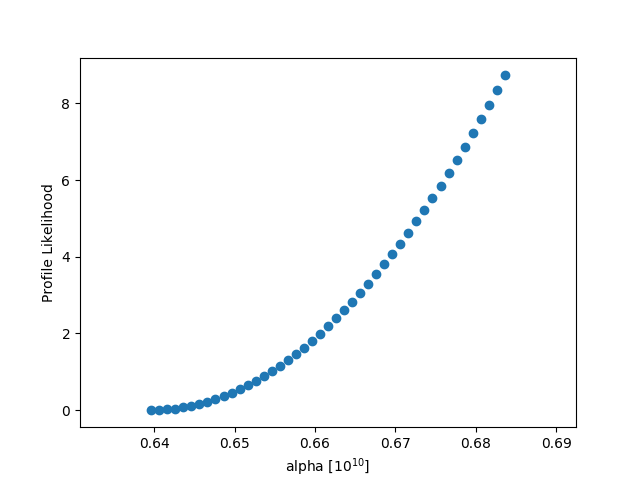

limit is:  0.6586578126393269


In [9]:
_,ax = plt.subplots()
ax.scatter(alpha,PL)
ax.set(xlabel='alpha [$10^{10}$]', ylabel='Profile Likelihood')
lim = np.interp(1.64, xp=PL, fp=alpha)
print('limit is: ', lim)

In [10]:
def get_lim(L):
    test = force_vs_time(separation=14.5e-6,height=0e-6,stroke=318e-6,frequency=13,
                     direction="x",lambda_par=L,yuk_or_grav="yuk",alpha=1e10)

    bandwidth = 1
    i=20
    drive_freq = 13*i
    fsamp = 5000
    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
    responsefilt = np.sqrt(2)*np.std(signal.filtfilt(b, a, list(test[1])*10))

    X0 = responsefilt
    X=1.72e-16
    Sigma = 4e-18
    alpha_hat = X/X0
    bla = Sigma/X0*3
    alpha = np.arange(alpha_hat,alpha_hat+bla, 0.001)
    PL = ((alpha*X0*1.72-X)/Sigma)**2
    
    return np.interp(1.64, xp=PL, fp=alpha)

In [11]:
L = np.logspace(0.3, 3, 100)*1e-6
# get_lim(L=L[0])
limit = [get_lim(L=L_) for L_ in L]

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.00e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.15e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.33e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.33e-06 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.17e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.26e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.36e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.36e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 4.30e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 4.64e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 5.01e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 5.41e-04 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

<IPython.core.display.Javascript object>


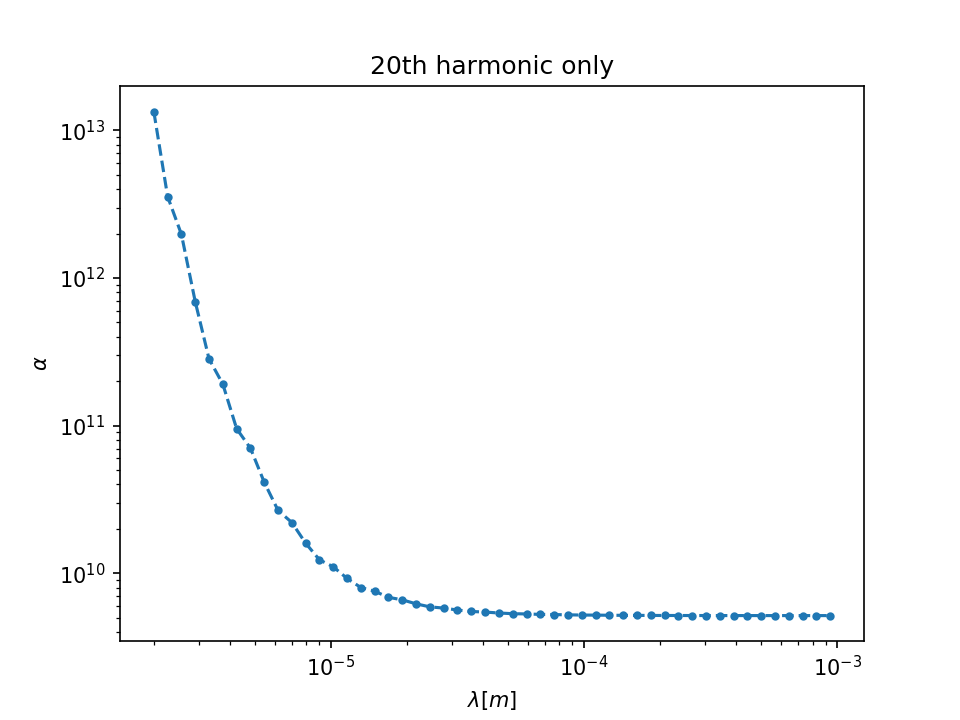

[Text(0, 0.5, '$\\alpha$'),
 Text(0.5, 0, '$\\lambda [m]$'),
 Text(0.5, 1.0, '20th harmonic only')]

In [28]:
_,ax = plt.subplots()
ax.loglog(L[::2],np.array(limit[::2])*1e10,'.--')
# ax.loglog(L[::2],np.array(limit2[::2])*1e10,'.--')
ax.set(xlabel='$\lambda [m]$', ylabel=r'$\alpha$', title='20th harmonic only')

### 4-harmonics-limit

In [12]:
test = force_vs_time(separation=14.5e-6,height=0e-6,stroke=318e-6,frequency=13,
                     direction="x",lambda_par=20e-6,yuk_or_grav="yuk",alpha=1e10)

bandwidth = 1
i=[4,5,6,20]
# i=[20]
drive_freq = [13*i_ for i_ in i]
fsamp = 5000
responsefilt = []
for drive_freq_ in drive_freq:
    b, a = signal.butter(3, [2.*(drive_freq_-bandwidth/2.)/fsamp, 2.*(drive_freq_+bandwidth/2.)/fsamp ], btype = 'bandpass')
    responsefilt.append(np.sqrt(2)*np.std(signal.filtfilt(b, a, list(test[1])*10)))

X0 = np.array(responsefilt)
X=np.array([9.8,8.99,3,1.72])*1e-16
Sigma = np.array([2,4,1.3,0.4])*1e-17
# X=np.array([1.72])*1e-16
# Sigma = np.array([0.4])*1e-17
# Sigma = 9.6e-17
alpha_hat = np.min(X/X0)
bla = np.min(Sigma/X0*3)
alpha = np.arange(0.7,0.8, 0.001)
PL = [sum(((alpha_*X0-X)/Sigma)**2) for alpha_ in alpha]

Your choice of separation or height is not existing
Taking 1.5e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.00e-05 for lambda
A separation of 1.45e-05 is selected
A height of 8.47e-21 is selected


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


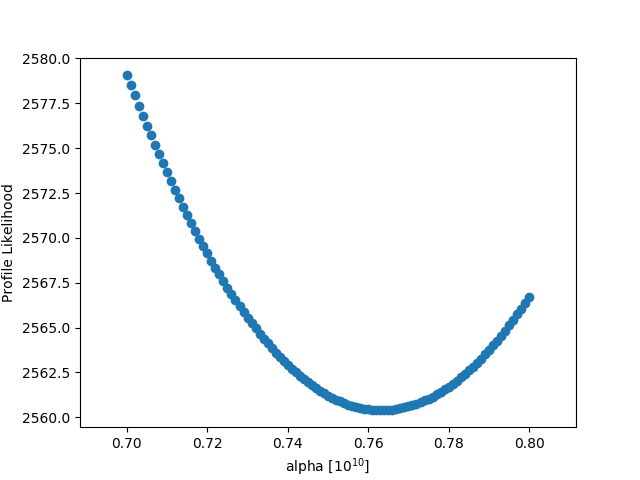

limit is:  0.7


In [13]:
_,ax = plt.subplots()
ax.scatter(alpha,PL)
ax.set(xlabel='alpha [$10^{10}$]', ylabel='Profile Likelihood')
lim = np.interp(1.64, xp=PL, fp=alpha)
print('limit is: ', lim)

In [14]:
lim_new = [6.080343158616365, 4.206951264075402, 3.132222297336904, 1.6479988314473242, 0.9253303915000829, 0.905692530769054, 0.5777883139365917, 0.46623843569576073, 0.4015500336871214, 0.3080449791857952, 0.24295727500990266, 0.22230259102939487, 0.19002274542903058, 0.1842918635870115, 0.15113794172389539, 0.12840236427617263, 0.13621871035382221, 0.12198297004593309, 0.12621805517218718, 0.1301741852654157, 0.11767237375476952, 0.11346762086995016, 0.108155682910928, 0.11164005804215801, 0.11057415040744797, 0.11804109233080153, 0.11254092809009583, 0.11694204933620714, 0.10963996130077458, 0.10526324550913874, 0.108142420743224, 0.11696066061998767, 0.12223824751033278, 0.10871315006807933, 0.10827557984546349, 0.12093529634443415, 0.10522657797625393, 0.10874507360067676, 0.1143585000272809, 0.11661224915549674, 0.1131002073618043, 0.11217188562726736, 0.11753571802502635, 0.10637022531217821, 0.11554993390025496, 0.11277640241737732, 0.11254306574504759, 0.11349059549268034, 0.11137326468226696, 0.11078100843952926]


<IPython.core.display.Javascript object>


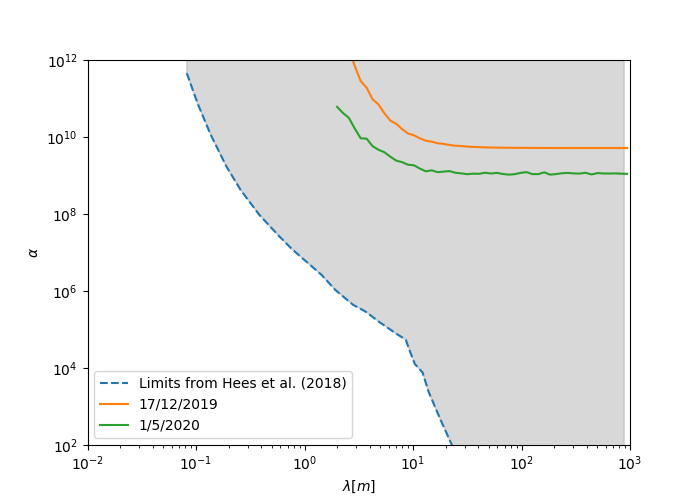

In [17]:
_, ax = plt.subplots(figsize=(7,5))
xs, ys = former_lim[::2], former_lim[1::2]
d = scipy.zeros(len(ys))+1e17
ax.loglog(xs,ys, '--', label='Limits from Hees et al. (2018)')
ax.fill_between(xs, ys, d, interpolate=True, color='gray', alpha=0.3)
ax.set(xlim=(1e-2,1e3), ylim=(1e2,1e12), xlabel='$\lambda [m]$', ylabel=r'$\alpha$')
ax.loglog(L[::2]*1e6,np.array(limit[::2])*1e10,'-', label='17/12/2019')
ax.loglog(L[::2]*1e6,np.array(lim_new)*1e10,'-', label='1/5/2020')
ax.legend()

In [16]:
former_lim = np.array([0.0822157553598952, 454980673817.3936,
0.10419580079467602, 70685282947.57416,
0.13642085099755275, 11568163257.164108,
0.1905956932476186, 1715866172.7967515,
0.2578693113173082, 421569939.69230753,
0.3845972394757752, 94006964.91190147,
0.5799691604992416, 27011654.41160183,
0.7682211297736745, 12169396.632278819,
1.0626537371810123, 5493060.014722281,
1.4384754313520145, 2605701.741847717,
1.9259959258909147, 1061431.2370312337,
2.81226755400795, 434024.15311738895,
3.6463957404911462, 292852.0572165211,
4.936384179999543, 153714.98177950707,
7.054513807923377, 76884.64837178614,
8.571468288982107, 54414.12355508867,
9.44389283461903, 25579.477834524758,
10.40552785118725, 12648.833936344077,
12.237209701135189, 7680.077107957737,
13.923821834142421, 2411.770376247122,
18.035053169874928, 436.53801063353654,
27.168644459168583, 33.648440900249696,
40.507605022797215, 5.005242275611374,
57.845179858874566, 0.9570876764662278,
77.43439328264257, 0.3027087584643415,
108.25782037834313, 0.10614101717801905,
137.33086725219047, 0.05555331883081166,
176.07467672639083, 0.022586541406253068,
211.61405702939962, 0.014439671775858368,
271.3792763664766, 0.007953709492825624,
367.3999303609552, 0.0043915357534648055,
441.67961061234746, 0.0040010637230247885,
519.5726780124636, 0.003462119193699233,
719.192055796681, 0.003694252436825624,
883.6081823282914, 0.003727836801649396])
